# Password Strength Detection and Vulnerability test

**California State University Long Beach**

**IS 665: CyberSecurity Analytics**

**Group 3 : Aayush Doshi, Prayag Padwal, Sanket Dave**


## Importing Libraries

In [5]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

## Importing Data

In [7]:
data = pd.read_csv('./data.csv', on_bad_lines='skip')

In [9]:
data.shape

(669640, 2)

**Checking for duplicates**

In [8]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
669635    False
669636    False
669637    False
669638    False
669639    False
Length: 669640, dtype: bool

In [10]:
data.duplicated().sum()

0

**Checking for null values**

In [7]:
data.isnull()

,password,strength
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
669635,False,False
669636,False,False
669637,False,False
669638,False,False


In [8]:
data.isnull().any()

password     True
strength    False
dtype: bool

In [9]:
data.password.isnull().any().sum()

1

In [11]:
rows_with_null = data[data.isnull().any(axis=1)]

In [12]:
rows_with_null

,password,strength
367579,NaN,0


In [30]:
data.dropna(inplace= True)

In [29]:
data.password.isnull().any().sum()

0

**Checking datatypes**

In [28]:
data.dtypes

password    object
strength     int64
dtype: object

### Semantic Analysis

In [31]:
data.password

0             kzde5577
1             kino3434
2            visi7k1yr
3             megzy123
4          lamborghin1
              ...     
669635      10redtux10
669636       infrared1
669637    184520socram
669638       marken22a
669639        fxx4pw4g
Name: password, Length: 669639, dtype: object

In [32]:
type(data["password"][0])

str

In [33]:
data["password"].str.isnumeric().sum()

108

**Which passwords holds only numeric values?**

In [34]:
data[data["password"].str.isnumeric()]

,password,strength
5597,445566,0
6263,1995151,0
27970,5252752,0
34293,2091024,0
41338,603030,0
...,...,...
634830,000000,0
635587,11,0
649848,1050,0
652957,363761,0


**Which Passwords holds only Upper Case values?**

In [35]:
data["password"].str.isupper().sum()

10477

In [36]:
data[data["password"].str.isupper()]

,password,strength
268,AS0130066,1
269,QWERTY0011,1
323,YADHJIGSAWS11,1
346,IRZA98,0
486,PEPITO00,1
...,...,...
669458,ARNAV_KUSHI,1
669460,36802907A,1
669549,MARLENY2090,1
669557,RHBDJQHJU25,1


**How many password textual actually holds only alphabet?** 

In [37]:
data["password"].str.isalpha().sum()

330

In [38]:
data[data["password"].str.isalpha()]

,password,strength
231,gtlek,0
4602,trcske,0
6096,jijik,0
6500,piccolo,0
10740,Stphane,0
...,...,...
656049,vntm,0
657578,fuckyou,0
666278,mueco,0
666328,PomarancaÇ,1


**How many password textual actually holds alpha-numeric character ?**

In [39]:
data["password"].str.isalnum().sum()

650892

In [40]:
data[data["password"].str.isalnum()]

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
...,...,...
669635,10redtux10,1
669636,infrared1,1
669637,184520socram,1
669638,marken22a,1


In [41]:
data[data["password"].str.isalnum()].shape

(650892, 2)

**How many password textual actually holds title-case character?**

In [42]:
data["password"].str.istitle().sum()


6287

In [43]:
data[data["password"].str.istitle()]

,password,strength
65,Iamthelegend1!,2
369,Staterkom20081993,2
377,Oshity07142014,2
464,Scipio21152030067254,2
546,1A2Z3E4R,1
...,...,...
669079,Kustyk33935432,2
669157,28091974Zezinho,2
669199,City&Colour241091,2
669233,Codificando10~,2


In [44]:
data[data["password"].str.istitle()].shape

(6287, 2)

**How many password textual actually holds special character?**

In [45]:
data["password"]

0             kzde5577
1             kino3434
2            visi7k1yr
3             megzy123
4          lamborghin1
              ...     
669635      10redtux10
669636       infrared1
669637    184520socram
669638       marken22a
669639        fxx4pw4g
Name: password, Length: 669639, dtype: object

**Let's get a package with special characters defined.**

In [46]:
import string

In [47]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
# Coding a function that returns 1 if it contains a special character

def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [49]:
data[data["password"].apply(find_semantics)==1]

,password,strength
20,elyass15@ajilent-ci,2
22,klara-tershina3H,2
44,olmaz.,0
50,ok>bdk,0
60,khmer100.03278&?><Mnb,2
...,...,...
669554,gRAPEHORSE_289,2
669606,Felidae_blckPanther001,2
669618,juanpaganini588@gmail.com,2
669622,weslley.06888524,2


## Feature Engineering

In [50]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


### Password Feature Engineering

- Length of password
- Frequency of Lower Characters
- Frequency of Upper Characters
- Frequency of Numerical Characters
- Frequency of Special Characters


In [51]:
# Length of password

data.password.str.len()

0          8
1          8
2          9
3          8
4         11
          ..
669635    10
669636     9
669637    12
669638     9
669639     8
Name: password, Length: 669639, dtype: int64

In [52]:
data["length"] = data["password"].str.len()
data["length"]

0          8
1          8
2          9
3          8
4         11
          ..
669635    10
669636     9
669637    12
669638     9
669639     8
Name: length, Length: 669639, dtype: int64

In [53]:
# Frequency of Lowercase Characters
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [54]:
# Frequency of uppercase Characters
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [55]:
# Frequency of Numeric Characters 
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [56]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [57]:
# Frequency of Special-case Characters 
def freq_special_case(row):
    special_chars = [] 
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char) 
    return len(special_chars) 

In [58]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3)

In [59]:
data["special_char_freq"] = data["special_char_freq"]/data["length"] 

In [60]:
data

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,kzde5577,1,8,0.500,0.0,0.500,0.0
1,kino3434,1,8,0.500,0.0,0.500,0.0
2,visi7k1yr,1,9,0.778,0.0,0.222,0.0
3,megzy123,1,8,0.625,0.0,0.375,0.0
4,lamborghin1,1,11,0.909,0.0,0.091,0.0
...,...,...,...,...,...,...,...
669635,10redtux10,1,10,0.600,0.0,0.400,0.0
669636,infrared1,1,9,0.889,0.0,0.111,0.0
669637,184520socram,1,12,0.500,0.0,0.500,0.0
669638,marken22a,1,9,0.778,0.0,0.222,0.0


## Data Analysis

**Performing Descriptive Statistics**

- mean,
- median,
- min,
- max etc.

In [61]:
data[["length" , "strength"]]

,length,strength
0,8,1
1,8,1
2,9,1
3,8,1
4,11,1
...,...,...
669635,10,1
669636,9,1
669637,12,1
669638,9,1


In [62]:
data[["length" , "strength"]].groupby("strength").agg(["min", "max" , "mean" , "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.549604    7.0
1             8   13   9.618964    9.0
2            14  220  15.932497   16.0

**Higher the length, Higher the strength. In case on alphabet frequency higher is not better. On an average , 42% of characters are lowercase for higher strength, so that we can say when the  number of lower characters increases then strength of password will decrease.**

In [63]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']
for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.549604    7.0
1             8   13   9.618964    9.0
2            14  220  15.932497   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708594  0.714
1                   0.0  0.923  0.629739  0.667
2                   0.0  0.933  0.422641  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012335  0.000
1                   0.0  0.923  0.008456  0.000
2                   0.0  0.905  0.367294  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

In [64]:
data[['length','strength', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']].groupby("strength").agg(["mean"])

,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
,mean,mean,mean,mean,mean
strength,,,,,
0,6.549604,0.708594,0.012335,0.275492,0.003577
1,9.618964,0.629739,0.008456,0.359912,0.001894
2,15.932497,0.422641,0.367294,0.195979,0.014067


In [98]:
df

NameError: name 'df' is not defined

# 

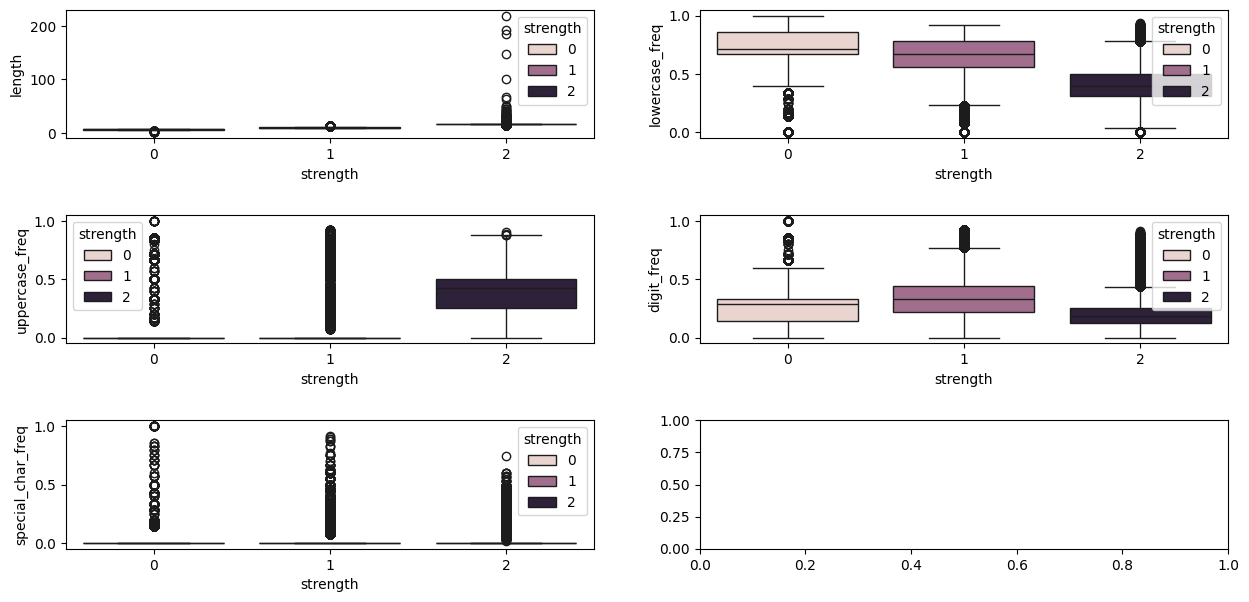

In [66]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))
sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

**Higher Lowercase frequency is seen in low strength passwords** 

**For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.**

**In digit_freq there is a split of majority poplutation of strength 1 and 2  but for 0 and 1 strength , there is overlap so no too much to say there.But we can say a nicely propotioned password is good..**

## Feature engineering

In [67]:
data[data['strength']==0]

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
21,intel1,0,6,0.833,0.0,0.167,0.000000
35,lsdlsd1,0,7,0.857,0.0,0.143,0.000000
44,olmaz.,0,6,0.833,0.0,0.000,0.166667
50,ok>bdk,0,6,0.833,0.0,0.000,0.166667
58,d04m11,0,6,0.333,0.0,0.667,0.000000
...,...,...,...,...,...,...,...
669572,o3kkmwz,0,7,0.857,0.0,0.143,0.000000
669573,yenni91,0,7,0.714,0.0,0.286,0.000000
669593,vehlfb8,0,7,0.857,0.0,0.143,0.000000
669608,mo1152,0,6,0.333,0.0,0.667,0.000000


In [68]:

def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    # 1 row
    # 2 column
    
    # violinplot
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    
    plt.legend()
    plt.show()

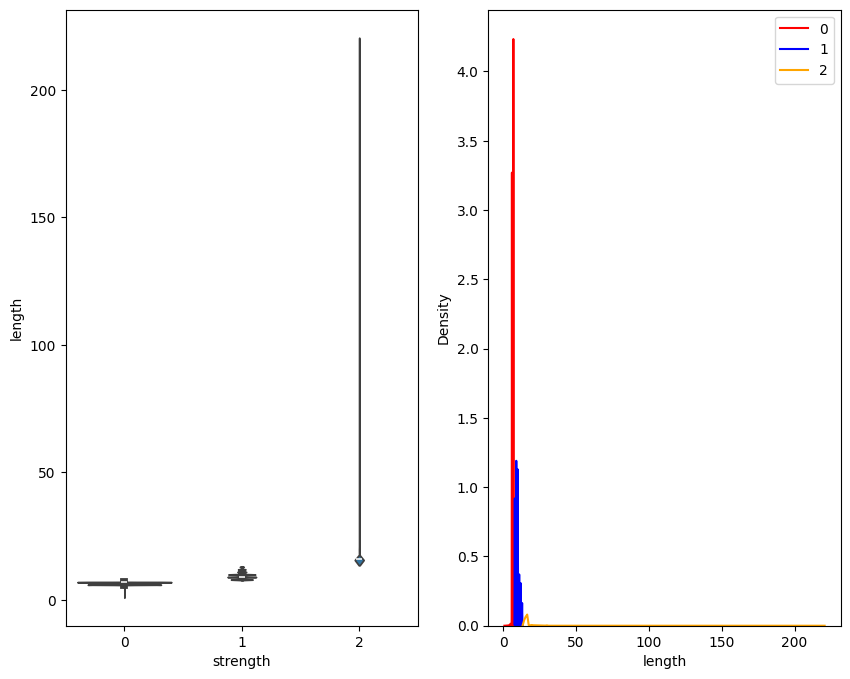

In [69]:
get_dist(data , "length")

**we have few overlappping region in distribution plot**

**when class is 2 , we have higher value of 'length' than class 1 & class 0**

**it means 'length' is a interesting feature as we have very less overlapping region**

**similarly from violinplot ,we will say on account of less overlappping ,this feature 'length' is amazing & useful in determining the strength**

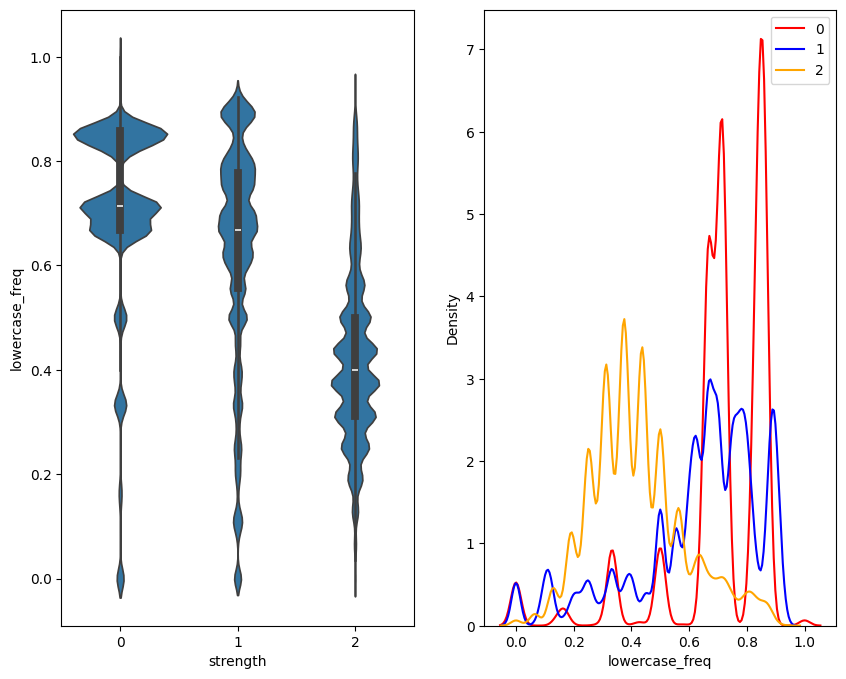

In [70]:
get_dist(data , 'lowercase_freq')

**Distribution plot** - 

We have some kind of overlappping region in distribution plot. When class is 2 , we have less value of 'lower_freq' than class 1 & class 0, it means 'lower_freq' is an important feature.

**Violin plot** -

Similarly from violinplot ,we will say on account of such overlappping , when class is 2 we have less value of 'lower_freq' than class 1 & class 0

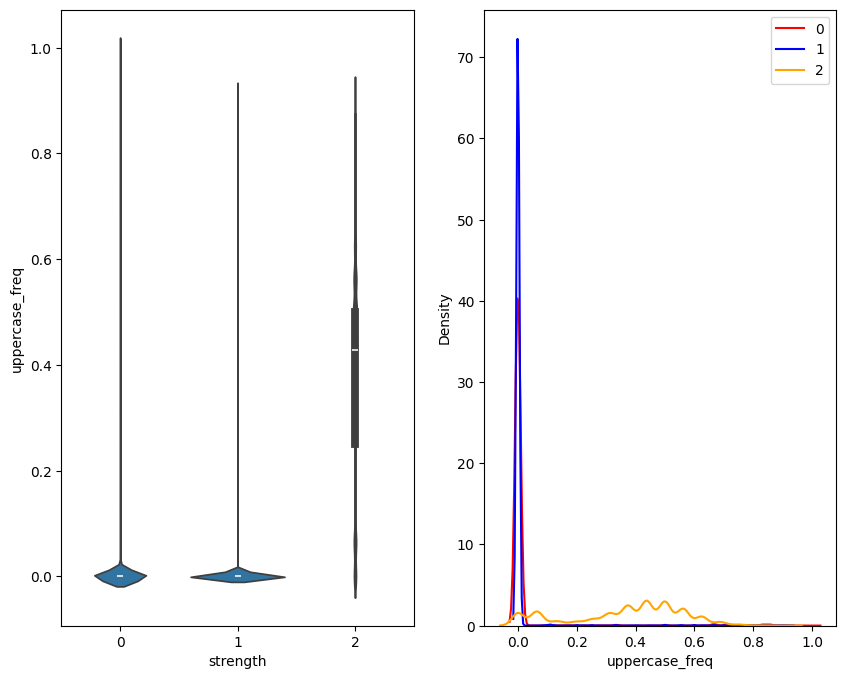

In [71]:
get_dist(data , 'uppercase_freq')

**Distribution plot** - 

we have quite high overlappping region in distribution plot, it means 'upper_freq' is not that much important feature.

**Violin plot** -

similarly from violinplot ,we will say on account of such huge overlappping

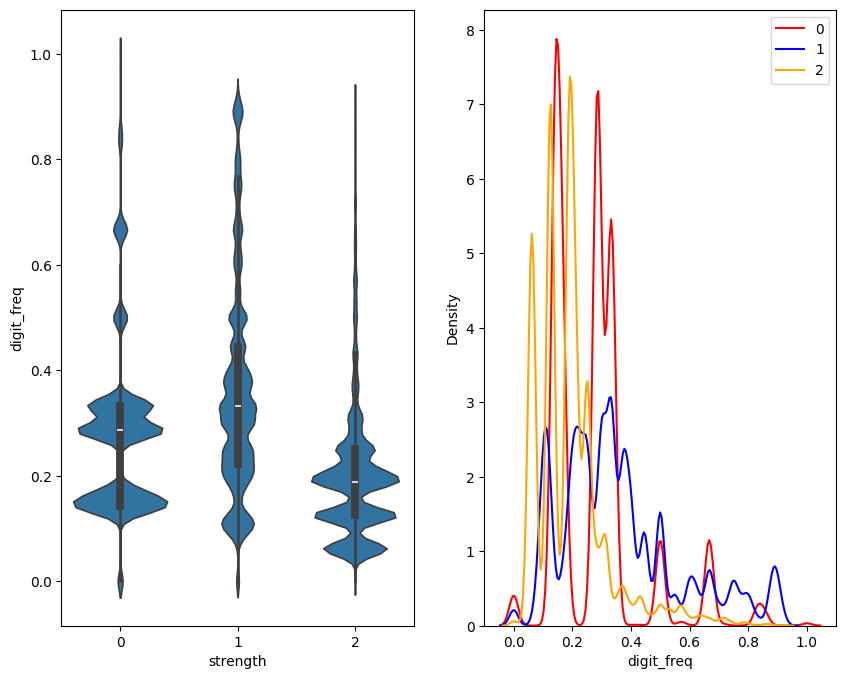

In [72]:
get_dist(data , 'digit_freq')

we have quite high overlappping region in distribution plot 

'upper_freq' is not that much important feature

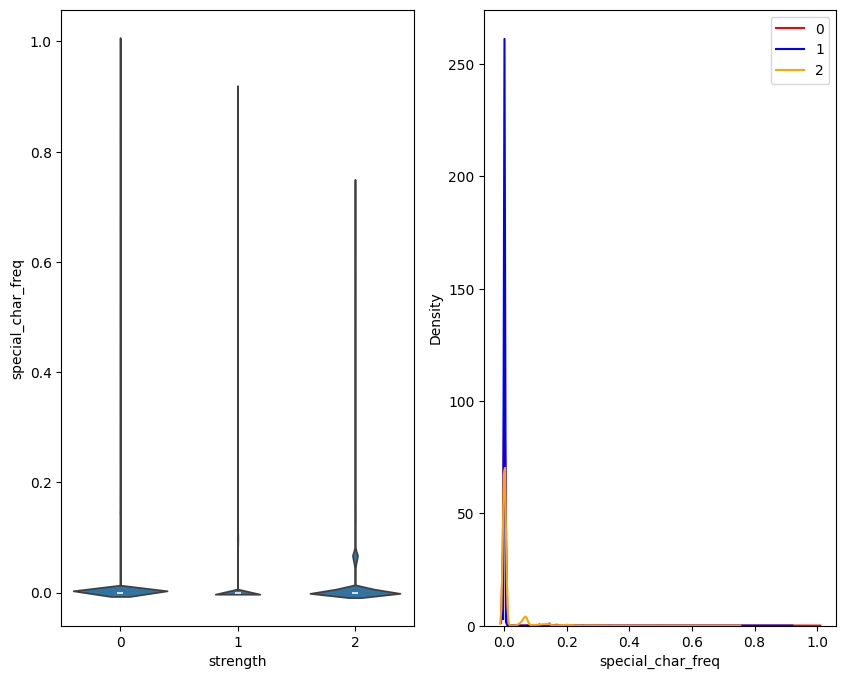

In [73]:
get_dist(data , 'special_char_freq')

In summary, We determined the lower_freq and length variables as important variables.


## Apply TF-IDF on data

TF-IDF -> Term Frequency-Inverse Document Frequency

TF-IDF is an abbreviation for the concept of 'Term Frequency-Inverse Document Frequency' and is a text mining method used in fields such as natural language processing (NLP) and text mining. This method is used to evaluate the importance of words within documents and convert text data into numerical vectors. The main purpose of TF-IDF is to measure the importance of a word in a document within the overall document collection. This is done by taking into account how often a word occurs within a document (term frequency) and how rare the same word is in other documents (inverse document frequency).

Term Frequency (TF - Term Frequency): Measures how often a word in a document appears within the document. Usually calculated by dividing the number of words by the total number of words in the document. High TF means a word occurs frequently within the document.

Inverse Document Frequency (IDF): Measures how rare a word is among other documents. Rare words have higher IDF value. IDF is calculated by dividing the total number of documents within the document collection by the number of documents containing that word.

TF-IDF Score: It is calculated by multiplying TF and IDF values. The TF-IDF score of a word in a particular document reflects the importance of that word in the document. So, a word with high TF and high IDF will have a high TF-IDF score.

TF-IDF is useful in text mining and information extraction applications because it converts text data into numerical vectors, making it easier to use machine learning algorithms. Especially widely used in document classification, text classification, summarization, feature extraction and similar tasks.

In [101]:
dataframe = data.sample(frac=1)
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
516523,xhyn6k7i,1,8,0.750,0.0,0.250,0.000000
374597,suxen1998,1,9,0.556,0.0,0.444,0.000000
262975,apdjyk2,0,7,0.857,0.0,0.143,0.000000
569183,934060341pp,1,11,0.182,0.0,0.818,0.000000
111562,lakshmibalaji123!,2,17,0.765,0.0,0.176,0.058824
...,...,...,...,...,...,...,...
164982,imycik313,1,9,0.667,0.0,0.333,0.000000
153958,JiNOcaJIdifO353,2,15,0.400,0.4,0.200,0.000000
330398,dvcsigns1,1,9,0.889,0.0,0.111,0.000000
668634,kundwica2312,1,12,0.667,0.0,0.333,0.000000


In [102]:
dataframe.isnull().sum()

password             0
strength             0
length               0
lowercase_freq       0
uppercase_freq       0
digit_freq           0
special_char_freq    0
dtype: int64

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer="char")

In [104]:
x = list(dataframe["password"])

In [105]:
X = vectorizer.fit_transform(x)

In [106]:
dataframe["password"].shape

(669639,)

In [107]:
X.toarray() 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.36018772, 0.35860854, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.36890495, 0.27761759,
       0.        , 0.35447859, 0.        , 0.        , 0.29492783,
       0.        , 0.        , 0.        , 0.        , 0.     

In [109]:
vectorizer.get_feature_names_out()

array(['\x01', '\x02', '\x04', '\x05', '\x06', '\x08', '\x0e', '\x0f',
       '\x10', '\x11', '\x12', '\x13', '\x16', '\x17', '\x18', '\x19',
       '\x1b', '\x1c', '\x1d', '\x1e', ' ', '!', '"', '#', '$', '%', '&',
       '(', ')', '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']',
       '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z', '{', '|', '}', '~', '\x7f', '\x81', '\x8d', '\xa0',
       '¡', '¢', '¤', '¦', '§', '¨', '«', '¯', '°', '±', '²', '³', '´',
       'µ', '¶', '·', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', 'ß', 'à',
       'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'í', 'î', 'ï',
       'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ù', 'ú', 'û', 'ü', 'ý',
       'þ', 'ÿ', 'œ', 'ƒ', '—', '‚', '‡', '…', '‹', '›', '™'],
      dtype=object)

In [110]:
len(vectorizer.get_feature_names_out())

153

In [111]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())
df2

,,,,,,,,,,,...,ÿ,œ,ƒ,—,‚,‡,…,‹,›,™
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
df2.shape

(669639, 153)

In [113]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']

In [114]:
y = dataframe["strength"]

**Splitting the data into trianing and testing**

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [117]:
X_train.shape

(535711, 155)

In [118]:
X_train[["length","lowercase_freq"]].isnull().sum()

length            1
lowercase_freq    1
dtype: int64

In [119]:
X_train.dropna(inplace=True)

In [120]:
X_train[["length","lowercase_freq"]].isnull().sum()

length            0
lowercase_freq    0
dtype: int64

In [132]:
print(X_train.shape)
print(y_train.shape)
y_train = y_train.drop(0)
print(y_train.shape)

(535710, 155)
(535711,)
(535710,)


In [123]:
X_test.shape

(133928, 155)

## Logistic Regression 

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
clf = LogisticRegression(multi_class="multinomial")

**Imputing the mean in case of missing values as logistic regression can not deal with the missing values on its own.**

In [87]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or median, most_frequent
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [88]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [89]:
y_pred = clf.predict(X_test)

In [90]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [91]:
from collections import Counter

In [92]:
Counter(y_pred)

Counter({1: 112043, 2: 12059, 0: 9826})

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.29      0.38     17849
           1       0.83      0.94      0.88     99382
           2       0.82      0.59      0.69     16697

    accuracy                           0.81    133928
   macro avg       0.73      0.61      0.65    133928
weighted avg       0.79      0.81      0.79    133928



## Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [133]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
# Initialize the model
clf = RandomForestClassifier(n_estimators=100)

In [135]:
# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier()

In [142]:
# Predictions
predictions = clf.predict(X_test)

In [143]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.04      0.08     17952
           1       0.75      1.00      0.85     99307
           2       0.21      0.00      0.01     16669

    accuracy                           0.75    133928
   macro avg       0.59      0.35      0.31    133928
weighted avg       0.69      0.75      0.64    133928



## Make prediction with user-entered input

In [138]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    
    # 151 dimension
    sample_matrix = vectorizer.transform(sample_array) 
    
    # +2 dimension
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    # 151 + 2 
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,155)
    
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [140]:
predict()

'Password is normal'

## Model Evaluation

In [104]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [109]:
print("Accuracy for Logistic Model :",round(accuracy_score(y_test , y_pred),2)*100 ,"%")
print("Accuracy for Random Forest Model :",round(accuracy_score(y_test , predictions),2)*100 ,"%")

Accuracy for Logistic Model : 81.0 %
Accuracy for Random Forest Model : 95.0 %
